<a href="https://colab.research.google.com/github/vin136/Machine-Learning-Interview-Questions/blob/main/Take_Home_Exam_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

The code below fits a simple neural network to a dataset. The goal of this exercise is to fill-in some missing functions in the implementation. 

Please read the instructions and the code carefully before beginning to implement.
## The Model
Our neural network conatins a single hidden layer which is followed by an output layer. The network is defined as follows.

Given the input vector $x \in \mathbb{R}^{D_x}$, the hidden layer outputs the vector $h \in \mathbb{R}^{D_h}$ which is given as 
\begin{align}h = f(Ax+b) \end{align}where:
* $A \in \mathbb{R}^{D_x \times D_h}$ is a weights matrix
* $b \in \mathbb{R}^{D_h}$ is a bias vector
* $f$ is the Swish activation function, given by $f(x)=x*sigmoid(x)$

The output layer takes $h$ as in input and produces the output vector $y$, which is given as
   

\begin{align}y = Ch+d\end{align}where:
* $C \in \mathbb{R}^{D_h \times D_y}$ is a weights matrix
* $d \in \mathbb{R}^{D_y}$ is a bias vector

## The Task

### Implementing the Model
The $NeuralNetSolver$ class contains the definition of the model, the forward and backward pass calculation and the fitting method. Please make the following changes in that class:
1. Implement the $get\_loss$ method to calculate a Mean Squared Error loss.
2. Implement the $forward$ method according to the definition of the model.
3. Implement the method $get\_layer\_1\_grads$ which should return the gradients of the hidden layer's weights matrix $A$ and biases vector $b$. For a refresher on how to do the math, see e.g. [here](https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf) (note that this example uses a different activation function).

### Improving the Termination Criteria of the Solver
The $TerminationCriteria$ class contains the criteria that determine when to stop training the model. The stub implementation simply stops after a predetermined number of iterations. Please change the implementation so that it would be more effective and robust.

### Improving the Optimizer
The $Optimizer$ class takes care of calculating the parameter updates, given the gradients. The stub implementation is a simple gradient descent and it is slow to converge. Please change it to have:
1. A [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) term.
2. An adaptive learning rate for each parameter, as defined in [RMSProp](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp).

# Imports

In [29]:
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from typing import Tuple, List, Collection, Mapping


# Optimizer

In [108]:
class Optimizer:
    """
      This class is responsible for calculating parameter updates during optimization.
    """
    LEARNING_RATE = 1e-2
    DECAY_RATE = 0.99
    EPSILON = 1e-8
    MOMENTUM = 0.99

    def __init__(self, param_names: Collection[str]):
        """
        :param param_names:
            A list of the parameter names to be optimized.
        """
        self.param_names = param_names
        self.cache = {}
        self.momentum = {}

    def step(self, param_grads: Mapping[str, np.array]) -> Mapping[str, np.array]:
        """
            Calculate the parameter updates for a single step of optimization.
        :param param_grads:
            A dictionary of the parameter gradients.
        :return:
          A dictionary of parameter updates.
        """
        param_updates = {}
        for param_name in self.param_names:
            grad = param_grads[param_name]
            if param_name not in self.cache:
                self.cache[param_name] = np.zeros_like(grad)
            self.cache[param_name] = self.DECAY_RATE * self.cache[param_name] + (1 - self.DECAY_RATE) * grad ** 2
            lr = self.LEARNING_RATE / (np.sqrt(self.cache[param_name]) + self.EPSILON)
            if param_name not in self.momentum:
                self.momentum[param_name] = np.zeros_like(grad)
            self.momentum[param_name] = self.MOMENTUM * self.momentum[param_name] - lr * grad
            param_updates[param_name] = self.momentum[param_name]

        return param_updates


In [116]:
class Optimizer:
    """
      This class is responsible for calculating parameter updates during optimization.
    """
    LEARNING_RATE = 1e-2

    def __init__(self, param_names: Collection[str]):
      """
      :param param_names:
        A list of the parameter names to be optimized.
      """
      pass

    def step(self, param_grads: Mapping[str, np.array]) -> Mapping[str, np.array]:
        """
            Calculate the parameter updates for a single step of optimization.
        :param param_grads:
            A dictionary of the parameter gradients.
        :return:
          A dictionary of parameter updates.
        """
        param_updates = {}
        for param_name, param_grad in param_grads.items():
            param_updates[param_name] = self.LEARNING_RATE * param_grad

        return param_updates

# Termination Criteria

In [117]:
class TerminationCriteria:
    def __init__(self, max_iter):
        self.max_iter = max_iter

    def is_over(self, iter: int) -> bool:
        """
        : iter
            The iteration number
        :return:
            True if the optimization should terminate, False otherwise.
        """

        return iter > self.max_iter

# Model

In [118]:
class NeuralNetSolver:
    HIDDEN_DIM = 32
    INPUT_DIM = 1
    OUTPUT_DIM = 1    
    
    MAX_ITER = 100000
    MIN_TRAIN_LOSS = 1e-6
    INIT_RANGE = 1
    NUM_PRINTS = 10

    def __init__(self):
        """
        C'tor
        :param input_dim:
            The dimension of the input vector
        """
        self.params_dict = {
            'weights_1': np.random.normal(0, self.INIT_RANGE, (self.INPUT_DIM, self.HIDDEN_DIM)),
            'bias_1': np.zeros(shape=(1, self.HIDDEN_DIM)),
            'weights_2': np.random.normal(0, self.INIT_RANGE, (self.HIDDEN_DIM, self.OUTPUT_DIM)),
            'bias_2': np.zeros(shape=(1, self.OUTPUT_DIM))}

        self.optimizer = Optimizer(self.params_dict.keys())
        self.termination_criteria = TerminationCriteria(self.MAX_ITER)

    @staticmethod
    def act_fn(x: np.array) -> np.array:
        """
            The activation function.
        :param x:
            An input array
        :return:
            The result of activation function applied to the x element-wise.
        """
        x = np.float128(x)
        return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))
        
       


    def forward(self, x: np.array) -> np.array:
        """
        Makes a prediction with the model.
        :param x:
            A batch of input feature vectors. The shape is [B, D_IN], where B is the batch dimension
            and D_IN is the dimension of the feature vector.
        :return:
            A batch of predictions. The shape is [B, D_OUT], where B is the batch dimension
            and D_OUT is the dimension of the prediction vector.
        """
        assert x.shape[1] == self.params_dict['weights_1'].shape[0]
        #print(f"input shape {x.shape}")
        # PLEASE IMPLEMENT THE FORWARD PASS HERE
        layer_1_out = np.dot(x, self.params_dict['weights_1']) + self.params_dict['bias_1']
        # Output of the first layer
        #layer_1_out = x @ self.params_dict['weights_1'] + self.params_dict['bias_1']

        # Apply the activation function to the output of the first layer
        layer_1_out_act = self.act_fn(layer_1_out)
        layer_2_out = np.dot(layer_1_out_act, self.params_dict['weights_2']) + self.params_dict['bias_2']
        # Compute the output of the second layer
        #layer_2_out = (layer_1_out_act @ self.params_dict['weights_2'] + self.params_dict['bias_2'])

        result = layer_2_out
        #print(result.shape)
        #print(f"result shape {result.shape}")
        assert result.ndim == 2
        assert result.shape[0] == x.shape[0]
        assert result.shape[1] == self.OUTPUT_DIM

        return result

    def get_loss_grad(self, X: np.array, y: np.array) -> Mapping[str, np.array]:
        """
            Calculates the gradient of the loss function.
        :param X:
            A batch of input feature vectors. The shape is [B, D_IN], where B is the batch dimension
            and D_IN is the dimension of the feature vector.
        :param y:
            A batch of outputs. The shape is [B, D_OUT], where B is the batch dimension
            and D_OUT is the dimension of the output vector.
        :return:
            A
        """

        layer_1_out = np.dot(X, self.params_dict['weights_1']) + self.params_dict['bias_1']
        layer_2_out = self.forward(X)
        #print(layer_2_out)

        weights1_grad, bias1_grad = self.get_layer_1_grads(X, y, layer_1_out, layer_2_out)
        weights2_grad, bias2_grad = self.get_layer_2_grads(X, y, layer_1_out, layer_2_out)

        return {'weights_1': weights1_grad, 'bias_1': bias1_grad,
                'weights_2': weights2_grad, 'bias_2': bias2_grad}

    def get_layer_1_grads(self, X: np.array, y: np.array,
                          layer_1_out: np.array, layer_2_out: np.array) -> Tuple[
        np.array, np.array]:
        """
            Calculates the gradients for the first layer of the neural network.
        :param X:
            A batch of input feature vectors. The shape is [B, D_IN], where B is the batch dimension
            and D_IN is the dimension of the feature vector.
        :param y:
            A batch of outputs. The shape is [B, D_OUT], where B is the batch dimension
            and D_OUT is the dimension of the output vector.
        :param layer_1_out:
            The output of the first linear layer, without activation.
        :param layer_2_out:
            The output of the 2nd layer.
        :return:
            A [HIDDEN_DIM] numpy array of weight gradients and a [1] numpy array of bias gradients
        """

       

        # PLEASE REPLACE THE FOLLOWING TWO LINES WITH A CALCULATION OF THE GRADIENTS
        delta2 = (layer_2_out - y)
        a1 = self.act_fn(layer_1_out)
        delta1 = np.dot(delta2, self.params_dict['weights_2'].T) * a1 * (1 - a1)

        weights1_grad = np.dot(X.T, delta1)
        bias1_grad = np.sum(delta1, axis=0, keepdims=True)

        #compute the gradient of the loss with respect to the output of the second layer
        #dL_dy = layer_2_out - y  # shape: [B, D_OUT]

        #compute derivative of output of layer2 w.r.t it's input=act(l1)
        #dlayer1_actl1 = self.params_dict['weights_2'].T

        

        # compute the derivative of the activation function with respect to the output of the first layer
        #sigmoid = 1 / (1 + np.exp(-layer_1_out))
        #dz_dlayer1_out = sigmoid * (1 - sigmoid)   # shape: [B, HIDDEN_DIM]

        # compute the derivative of the output of the first layer with respect to its parameters
        #dlayer1_out_dw1 = X  # shape: [B, D_IN]

        # compute the gradient of the loss with respect to the output of the first layer
        #dL_dlayer1_out = np.matmul(dL_dy, self.params_dict['weights_2'].T) * dz_dlayer1_out  # shape: [B, HIDDEN_DIM]

        # compute the gradient of the loss with respect to the parameters of the first layer
        #weights1_grad = np.matmul(dlayer1_out_dw1.T, dL_dlayer1_out)  # shape: [D_IN, HIDDEN_DIM]
        #bias1_grad = np.sum(dL_dlayer1_out, axis=0, keepdims=True)  # shape: [HIDDEN_DIM]

        assert weights1_grad.shape[0] == self.INPUT_DIM
        assert weights1_grad.shape[1] == self.HIDDEN_DIM
        assert weights1_grad.ndim == 2

        assert bias1_grad.shape[0] == 1
        assert bias1_grad.shape[1] == self.HIDDEN_DIM
        assert bias1_grad.ndim == 2

        return weights1_grad, bias1_grad

    def get_layer_2_grads(self, X: np.array, y: np.array,
                          layer_1_out: np.array, layer_2_out: np.array) -> Tuple[
        np.array, np.array]:
        """
               Calculates the gradients for the second layer of the neural network.
           :param X:
               A batch of input feature vectors. The shape is [B, D_IN], where B is the batch dimension
               and D_IN is the dimension of the feature vector.
           :param y:
               A batch of outputs. The shape is [B, D_OUT], where B is the batch dimension
               and D_OUT is the dimension of the output vector.
           :param layer_1_out:
               The output of the first linear layer, without activation.
           :param layer_2_out:
               The output of the 2nd layer.
           :return:
               A [HIDDEN_DIM] numpy array of weight gradients and a [1] numpy array of bias gradients
           """
          


  
        delta2 = (layer_2_out - y) 
        #output after activation
        a1 = self.act_fn(layer_1_out)
        weights2_grad = np.dot(a1.T, delta2)
        bias2_grad = np.sum(delta2, axis=0, keepdims=True)

        #weights2_grad = ((layer_2_out - y).T @ self.act_fn(layer_1_out)).T
        #bias2_grad = np.sum((layer_2_out - y),axis=0, keepdims=True)

        assert weights2_grad.ndim == 2
        assert weights2_grad.shape[0] == self.HIDDEN_DIM
        assert weights2_grad.shape[1] == self.OUTPUT_DIM

        assert bias2_grad.shape[0] == 1
        assert bias2_grad.ndim == 2

        return weights2_grad, bias2_grad

    @staticmethod
    def get_loss(y, y_hat) -> np.array:
        """
            Calculate the loss
        :param y:
            The ground-truth responses.
        :param y_hat:
            The predicted responses.
        :return:
            A scalar containing the loss.
        """
        # PLEASE REPLACE WITH AN IMPLEMENTATION OF THE LOSS
        return np.mean((y - y_hat) ** 2)

    def fit(self, X_train: np.array, y_train: np.array, X_test: np.array, y_test: np.array) -> \
    Tuple[List, List]:
        """
            Fits the model to the given data.
        :param X_train:
            The training features
        :param y_train:
            The training outputs
        :param X_test:
            The test features
        :param y_test:
            The test output
        :return:
            The train losses and the test losses
        """
        iter = 0
        train_losses = []
        test_losses = []

        steps_for_print = self.MAX_ITER // self.NUM_PRINTS

        best_test_loss = 1e100

        while not self.termination_criteria.is_over(iter):
            y_hat = self.forward(X_train)
            train_loss = self.get_loss(y_hat, y_train)
            #print(f" iter:{iter},loss:{train_loss}")
            loss_grad = self.get_loss_grad(X_train, y_train)
            param_update_dict = self.optimizer.step(loss_grad)

            for param_name, param_update in param_update_dict.items():
                self.params_dict[param_name] -= param_update
            
            iter += 1

            if iter % steps_for_print == 0:
                y_hat = self.forward(X_test)
                test_loss = self.get_loss(y_hat, y_test)
                train_losses.append(math.log(train_loss))
                test_losses.append(math.log(test_loss))
                
                # if test_loss < best_test_loss:
                #     best_test_loss = test_loss
                # else:
                #     print('Early stopping')
                #     break

                print(f'Iteration {iter}, Test Loss={test_loss},Best = {best_test_loss}',train_losses)

        return train_losses, test_losses

In [71]:
# Define toy dataset
#X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([[0], [1], [1], [0]])


In [64]:
#nn = NeuralNetSolver()


#nn.forward(X)


array([[0.99156648],
       [0.128191  ],
       [1.17901213],
       [0.30320589]], dtype=float128)

# Generate Data and Train

In [119]:
X = np.expand_dims(np.linspace(0, 100, 50), -1)
y = np.expand_dims((5 * X[:, 0] + 3 * X[:, 0] ** 2 + 50), -1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [120]:
xt_min = X_train.min()
xt_max = X_train.max()

yt_min = y_train.min()
yt_max = y_train.max()

In [121]:
xtrn_norm = (X_train-xt_min)/(xt_max-xt_min)
ytrn_norm = (y_train-yt_min)/(yt_max-yt_min)

xtst_norm = (X_test-xt_min)/(xt_max-xt_min)
ytst_norm = (y_test-yt_min)/(yt_max-yt_min)



In [122]:
nn = NeuralNetSolver()



In [123]:
train_losses, test_losses = nn.fit(xtrn_norm, ytrn_norm, xtst_norm, ytst_norm)


Iteration 10000, Test Loss=0.00016903003637562227,Best = 1e+100 [-8.6517227193957]
Iteration 20000, Test Loss=1.4002386613471329e-05,Best = 1e+100 [-8.6517227193957, -11.05038563986257]
Iteration 30000, Test Loss=1.239553820911241e-05,Best = 1e+100 [-8.6517227193957, -11.05038563986257, -11.187565307618744]
Iteration 40000, Test Loss=1.0893153043039405e-05,Best = 1e+100 [-8.6517227193957, -11.05038563986257, -11.187565307618744, -11.318875045834524]
Iteration 50000, Test Loss=9.585474251455084e-06,Best = 1e+100 [-8.6517227193957, -11.05038563986257, -11.187565307618744, -11.318875045834524, -11.448606535607606]
Iteration 60000, Test Loss=8.446861129993683e-06,Best = 1e+100 [-8.6517227193957, -11.05038563986257, -11.187565307618744, -11.318875045834524, -11.448606535607606, -11.576965048762858]
Iteration 70000, Test Loss=7.4529404626397655e-06,Best = 1e+100 [-8.6517227193957, -11.05038563986257, -11.187565307618744, -11.318875045834524, -11.448606535607606, -11.576965048762858, -11.7041

# Loss Plot

Text(0.5, 0, 'Step')

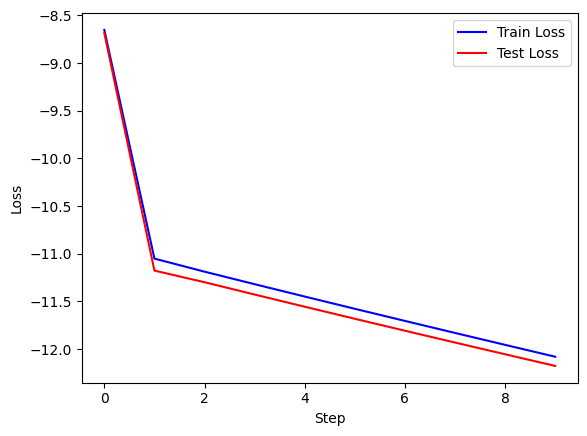

In [124]:
plt.plot(range(len(train_losses)), train_losses, 'b')
plt.plot(range(len(train_losses)), test_losses, 'r')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Step')

# Plot of True vs Predicted Values

Text(0, 0.5, 'Predicted')

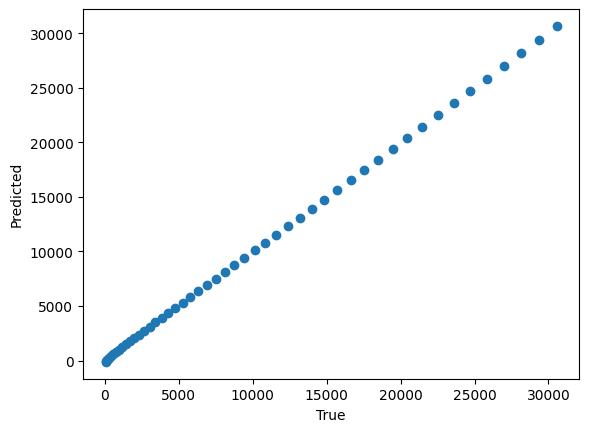

In [125]:

X_std = (X-xt_min)/(xt_max-xt_min)

plt.scatter(y, yt_min+(nn.forward(X_std)*(yt_max-yt_min)))
plt.xlabel('True')
plt.ylabel('Predicted')